# Table of Contents
 <p><div class="lev1 toc-item"><a href="#Package-imports" data-toc-modified-id="Package-imports-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Package imports</a></div><div class="lev2 toc-item"><a href="#Import-spgl1" data-toc-modified-id="Import-spgl1-11"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Import <code>spgl1</code></a></div><div class="lev2 toc-item"><a href="#Garbage-collection" data-toc-modified-id="Garbage-collection-12"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Garbage collection</a></div><div class="lev1 toc-item"><a href="#Plotting-data-from-PD-$\tau$-vs.-$\sigma$" data-toc-modified-id="Plotting-data-from-PD-$\tau$-vs.-$\sigma$-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Plotting data from PD <span class="MathJax_Preview" style="color: inherit; display: none;"></span><span class="MathJax" id="MathJax-Element-1-Frame" tabindex="0"><nobr><span class="math" id="MathJax-Span-1" style="width: 0.514em; display: inline-block;"><span style="display: inline-block; position: relative; width: 0.418em; height: 0px; font-size: 120%;"><span style="position: absolute; clip: rect(1.829em 1000.42em 2.438em -999.998em); top: -2.338em; left: 0em;"><span class="mrow" id="MathJax-Span-2"><span class="mi" id="MathJax-Span-3" style="font-family: STIXMathJax_Main-italic;">τ<span style="display: inline-block; overflow: hidden; height: 1px; width: 0.002em;"></span></span></span><span style="display: inline-block; width: 0px; height: 2.341em;"></span></span></span><span style="display: inline-block; overflow: hidden; vertical-align: -0.037em; border-left: 0px solid; width: 0px; height: 0.617em;"></span></span></nobr></span><script type="math/tex" id="MathJax-Element-1">\tau</script> vs. <span class="MathJax_Preview" style="color: inherit; display: none;"></span><span class="MathJax" id="MathJax-Element-2-Frame" tabindex="0"><nobr><span class="math" id="MathJax-Span-4" style="width: 0.675em; display: inline-block;"><span style="display: inline-block; position: relative; width: 0.546em; height: 0px; font-size: 120%;"><span style="position: absolute; clip: rect(1.829em 1000.55em 2.438em -999.998em); top: -2.338em; left: 0em;"><span class="mrow" id="MathJax-Span-5"><span class="mi" id="MathJax-Span-6" style="font-family: STIXMathJax_Main-italic;">σ<span style="display: inline-block; overflow: hidden; height: 1px; width: 0.034em;"></span></span></span><span style="display: inline-block; width: 0px; height: 2.341em;"></span></span></span><span style="display: inline-block; overflow: hidden; vertical-align: -0.037em; border-left: 0px solid; width: 0px; height: 0.617em;"></span></span></nobr></span><script type="math/tex" id="MathJax-Element-2">\sigma</script></a></div><div class="lev1 toc-item"><a href="#Plotting-data-from-Proximal-Denoising" data-toc-modified-id="Plotting-data-from-Proximal-Denoising-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Plotting data from Proximal Denoising</a></div><div class="lev2 toc-item"><a href="#Plotting-noise-scaling" data-toc-modified-id="Plotting-noise-scaling-31"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Plotting noise scaling</a></div><div class="lev2 toc-item"><a href="#Re-doing-figures" data-toc-modified-id="Re-doing-figures-32"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Re-doing figures</a></div><div class="lev2 toc-item"><a href="#Empirically-determining-scaling-of-$\mathbb{E}\|\tilde-x-(\sigma(z))---x\|_2^2$-for-$\sigma(z)-=-\|z\|_2^2$" data-toc-modified-id="Empirically-determining-scaling-of-$\mathbb{E}\|\tilde-x-(\sigma(z))---x\|_2^2$-for-$\sigma(z)-=-\|z\|_2^2$-33"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Empirically determining scaling of <span class="MathJax_Preview" style="color: inherit; display: none;"></span><span class="MathJax" id="MathJax-Element-4-Frame" tabindex="0" data-mathml="<math xmlns=&quot;http://www.w3.org/1998/Math/MathML&quot;><mrow class=&quot;MJX-TeXAtom-ORD&quot;><mi mathvariant=&quot;double-struck&quot;>E</mi></mrow><mo fence=&quot;false&quot; stretchy=&quot;false&quot;>&amp;#x2016;</mo><mrow class=&quot;MJX-TeXAtom-ORD&quot;><mover><mi>x</mi><mo stretchy=&quot;false&quot;>&amp;#x007E;</mo></mover></mrow><mo stretchy=&quot;false&quot;>(</mo><mi>&amp;#x03C3;</mi><mo stretchy=&quot;false&quot;>(</mo><mi>z</mi><mo stretchy=&quot;false&quot;>)</mo><mo stretchy=&quot;false&quot;>)</mo><mo>&amp;#x2212;</mo><mi>x</mi><msubsup><mo fence=&quot;false&quot; stretchy=&quot;false&quot;>&amp;#x2016;</mo><mn>2</mn><mn>2</mn></msubsup></math>" role="presentation" style="position: relative;"><nobr aria-hidden="true"><span class="math" id="MathJax-Span-12" style="width: 7.805em; display: inline-block;"><span style="display: inline-block; position: relative; width: 6.479em; height: 0px; font-size: 120%;"><span style="position: absolute; clip: rect(1.555em 1006.48em 2.919em -999.998em); top: -2.498em; left: 0em;"><span class="mrow" id="MathJax-Span-13"><span class="texatom" id="MathJax-Span-14"><span class="mrow" id="MathJax-Span-15"><span class="mi" id="MathJax-Span-16" style="font-family: STIXMathJax_DoubleStruck;">𝔼</span></span></span><span class="mo" id="MathJax-Span-17" style="font-family: STIXMathJax_Main;">‖</span><span class="texatom" id="MathJax-Span-18"><span class="mrow" id="MathJax-Span-19"><span class="munderover" id="MathJax-Span-20"><span style="display: inline-block; position: relative; width: 0.456em; height: 0px;"><span style="position: absolute; clip: rect(3.449em 1000.46em 4.131em -999.998em); top: -4.013em; left: 0em;"><span class="mi" id="MathJax-Span-21" style="font-family: STIXMathJax_Main-italic;">x<span style="display: inline-block; overflow: hidden; height: 1px; width: 0.002em;"></span></span><span style="display: inline-block; width: 0px; height: 4.017em;"></span></span><span style="position: absolute; top: -4.013em; left: 0.078em;"><span style="height: 0em; vertical-align: 0em; width: 0.381em; display: inline-block; overflow: hidden;"></span><span class="mo" id="MathJax-Span-22" style="font-family: STIXMathJax_Main;">̃&nbsp;<span style="height: 0em; vertical-align: 0em; margin-left: -0.263em;"></span></span><span style="display: inline-block; overflow: hidden; height: 1px; width: 0em;"></span><span style="display: inline-block; width: 0px; height: 4.017em;"></span></span></span></span></span></span><span class="mo" id="MathJax-Span-23" style="font-family: STIXMathJax_Main;">(</span><span class="mi" id="MathJax-Span-24" style="font-family: STIXMathJax_Main-italic;">σ<span style="display: inline-block; overflow: hidden; height: 1px; width: 0.04em;"></span></span><span class="mo" id="MathJax-Span-25" style="font-family: STIXMathJax_Main;">(</span><span class="mi" id="MathJax-Span-26" style="font-family: STIXMathJax_Main-italic;">z</span><span class="mo" id="MathJax-Span-27" style="font-family: STIXMathJax_Main;">)</span><span class="mo" id="MathJax-Span-28" style="font-family: STIXMathJax_Main;">)</span><span class="mo" id="MathJax-Span-29" style="font-family: STIXMathJax_Main; padding-left: 0.267em;">−</span><span class="mi" id="MathJax-Span-30" style="font-family: STIXMathJax_Main-italic; padding-left: 0.267em;">x<span style="display: inline-block; overflow: hidden; height: 1px; width: 0.002em;"></span></span><span class="msubsup" id="MathJax-Span-31"><span style="display: inline-block; position: relative; width: 0.949em; height: 0px;"><span style="position: absolute; clip: rect(3.222em 1000.38em 4.32em -999.998em); top: -4.013em; left: 0em;"><span class="mo" id="MathJax-Span-32" style="font-family: STIXMathJax_Main;">‖</span><span style="display: inline-block; width: 0px; height: 4.017em;"></span></span><span style="position: absolute; clip: rect(3.411em 1000.42em 4.131em -999.998em); top: -4.354em; left: 0.532em;"><span class="mn" id="MathJax-Span-33" style="font-size: 70.7%; font-family: STIXMathJax_Main;">2</span><span style="display: inline-block; width: 0px; height: 4.017em;"></span></span><span style="position: absolute; clip: rect(3.411em 1000.42em 4.131em -999.998em); top: -3.71em; left: 0.532em;"><span class="mn" id="MathJax-Span-34" style="font-size: 70.7%; font-family: STIXMathJax_Main;">2</span><span style="display: inline-block; width: 0px; height: 4.017em;"></span></span></span></span></span><span style="display: inline-block; width: 0px; height: 2.502em;"></span></span></span><span style="display: inline-block; overflow: hidden; vertical-align: -0.407em; border-left: 0px solid; width: 0px; height: 1.457em;"></span></span></nobr><span class="MJX_Assistive_MathML" role="presentation"><math xmlns="http://www.w3.org/1998/Math/MathML"><mrow class="MJX-TeXAtom-ORD"><mi mathvariant="double-struck">E</mi></mrow><mo fence="false" stretchy="false">‖</mo><mrow class="MJX-TeXAtom-ORD"><mover><mi>x</mi><mo stretchy="false">~</mo></mover></mrow><mo stretchy="false">(</mo><mi>σ</mi><mo stretchy="false">(</mo><mi>z</mi><mo stretchy="false">)</mo><mo stretchy="false">)</mo><mo>−</mo><mi>x</mi><msubsup><mo fence="false" stretchy="false">‖</mo><mn>2</mn><mn>2</mn></msubsup></math></span></span><script type="math/tex" id="MathJax-Element-4">\mathbb{E}\|\tilde x (\sigma(z)) - x\|_2^2</script> for <span class="MathJax_Preview" style="color: inherit; display: none;"></span><span class="MathJax" id="MathJax-Element-5-Frame" tabindex="0" data-mathml="<math xmlns=&quot;http://www.w3.org/1998/Math/MathML&quot;><mi>&amp;#x03C3;</mi><mo stretchy=&quot;false&quot;>(</mo><mi>z</mi><mo stretchy=&quot;false&quot;>)</mo><mo>=</mo><mo fence=&quot;false&quot; stretchy=&quot;false&quot;>&amp;#x2016;</mo><mi>z</mi><msubsup><mo fence=&quot;false&quot; stretchy=&quot;false&quot;>&amp;#x2016;</mo><mn>2</mn><mn>2</mn></msubsup></math>" role="presentation" style="position: relative;"><nobr aria-hidden="true"><span class="math" id="MathJax-Span-35" style="width: 5.684em; display: inline-block;"><span style="display: inline-block; position: relative; width: 4.737em; height: 0px; font-size: 120%;"><span style="position: absolute; clip: rect(1.555em 1004.74em 2.919em -999.998em); top: -2.498em; left: 0em;"><span class="mrow" id="MathJax-Span-36"><span class="mi" id="MathJax-Span-37" style="font-family: STIXMathJax_Main-italic;">σ<span style="display: inline-block; overflow: hidden; height: 1px; width: 0.04em;"></span></span><span class="mo" id="MathJax-Span-38" style="font-family: STIXMathJax_Main;">(</span><span class="mi" id="MathJax-Span-39" style="font-family: STIXMathJax_Main-italic;">z</span><span class="mo" id="MathJax-Span-40" style="font-family: STIXMathJax_Main;">)</span><span class="mo" id="MathJax-Span-41" style="font-family: STIXMathJax_Main; padding-left: 0.305em;">=</span><span class="mo" id="MathJax-Span-42" style="font-family: STIXMathJax_Main; padding-left: 0.305em;">‖</span><span class="mi" id="MathJax-Span-43" style="font-family: STIXMathJax_Main-italic;">z</span><span class="msubsup" id="MathJax-Span-44"><span style="display: inline-block; position: relative; width: 0.949em; height: 0px;"><span style="position: absolute; clip: rect(3.222em 1000.38em 4.32em -999.998em); top: -4.013em; left: 0em;"><span class="mo" id="MathJax-Span-45" style="font-family: STIXMathJax_Main;">‖</span><span style="display: inline-block; width: 0px; height: 4.017em;"></span></span><span style="position: absolute; clip: rect(3.411em 1000.42em 4.131em -999.998em); top: -4.354em; left: 0.532em;"><span class="mn" id="MathJax-Span-46" style="font-size: 70.7%; font-family: STIXMathJax_Main;">2</span><span style="display: inline-block; width: 0px; height: 4.017em;"></span></span><span style="position: absolute; clip: rect(3.411em 1000.42em 4.131em -999.998em); top: -3.71em; left: 0.532em;"><span class="mn" id="MathJax-Span-47" style="font-size: 70.7%; font-family: STIXMathJax_Main;">2</span><span style="display: inline-block; width: 0px; height: 4.017em;"></span></span></span></span></span><span style="display: inline-block; width: 0px; height: 2.502em;"></span></span></span><span style="display: inline-block; overflow: hidden; vertical-align: -0.407em; border-left: 0px solid; width: 0px; height: 1.457em;"></span></span></nobr><span class="MJX_Assistive_MathML" role="presentation"><math xmlns="http://www.w3.org/1998/Math/MathML"><mi>σ</mi><mo stretchy="false">(</mo><mi>z</mi><mo stretchy="false">)</mo><mo>=</mo><mo fence="false" stretchy="false">‖</mo><mi>z</mi><msubsup><mo fence="false" stretchy="false">‖</mo><mn>2</mn><mn>2</mn></msubsup></math></span></span><script type="math/tex" id="MathJax-Element-5">\sigma(z) = \|z\|_2^2</script></a></div><div class="lev1 toc-item"><a href="#MSE-as-a-function-of-sigma" data-toc-modified-id="MSE-as-a-function-of-sigma-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>MSE as a function of <code>sigma</code></a></div>

# Package imports

In [1]:
import sys

In [2]:
%pylab inline
import matplotlib.legend as mlegend
import matplotlib.lines as mlines

Populating the interactive namespace from numpy and matplotlib


In [3]:
import json

In [4]:
from datetime import datetime as dt
now = dt.now().ctime()
now = now.replace(' ', '_').replace(':', '-')
print(now)

Mon_Apr_24_15-15-48_2017


## Import `spgl1`

In [ ]:
curdir = !pwd
curdir = curdir[0]

In [ ]:
spgl1Directory = curdir+'/../SPGL1_python_port/'
sys.path.append(spgl1Directory)

In [ ]:
from spgl1 import spgl1

## Garbage collection

In [10]:
import gc
gc.collect()
gc.collect()

0

In [19]:
plt.close('all')

# Plotting data from PD $\tau$ vs. $\sigma$

In [5]:
with open('../data/ProxDenois_LSBP_7_Thu_Apr__6_18-49-35_2017.json', 'r+', encoding='utf-8') as fp:
    pdlsbp = json.load(fp)

In [6]:
pdlsbp.keys()

dict_keys(['BP_z_norm2sq', 'LS_x_norm1'])

In [7]:
pd_sigma = np.array(pdlsbp['BP_z_norm2sq'])
pd_tau = np.array(pdlsbp['LS_x_norm1'])

In [9]:
pd_tau_mean = pd_tau.mean(axis=1)
pd_tau_std = pd_tau.std(axis=1)
pd_sigma_mean = pd_sigma.mean(axis=1)
pd_sigma_std = pd_sigma.std(axis=1)

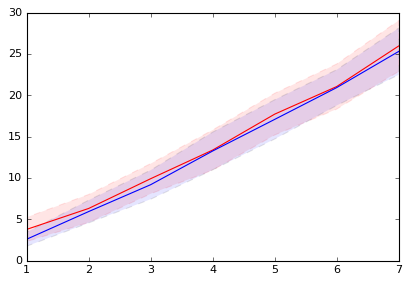

In [10]:
plt.fill_between(range(1,8), pd_sigma_mean - pd_sigma_std, pd_sigma_mean + pd_sigma_std, alpha=.1, linestyle='dashed', color='r');
plt.fill_between(range(1,8), pd_tau_mean - pd_tau_std, pd_tau_mean + pd_tau_std, alpha=.1, linestyle='dashed');
plt.plot(range(1,8), pd_sigma.mean(axis=1), c='r');
plt.plot(range(1,8), pd_tau.mean(axis=1), c='b');

# Plotting data from Proximal Denoising

In [14]:
doSaveFig = False

In [11]:
with open('../data/ProxDenois_7_Sat_Apr__1_15-17-55_2017.json', 'r+', encoding='utf-8') as fp:
    pd_data = json.load(fp)

In [12]:
pd_N = np.array(pd_data['N'])
pd_sqZ = np.array(pd_data['sqNormZ'])

In [13]:
pd = np.vstack((pd_N, pd_sqZ)).T

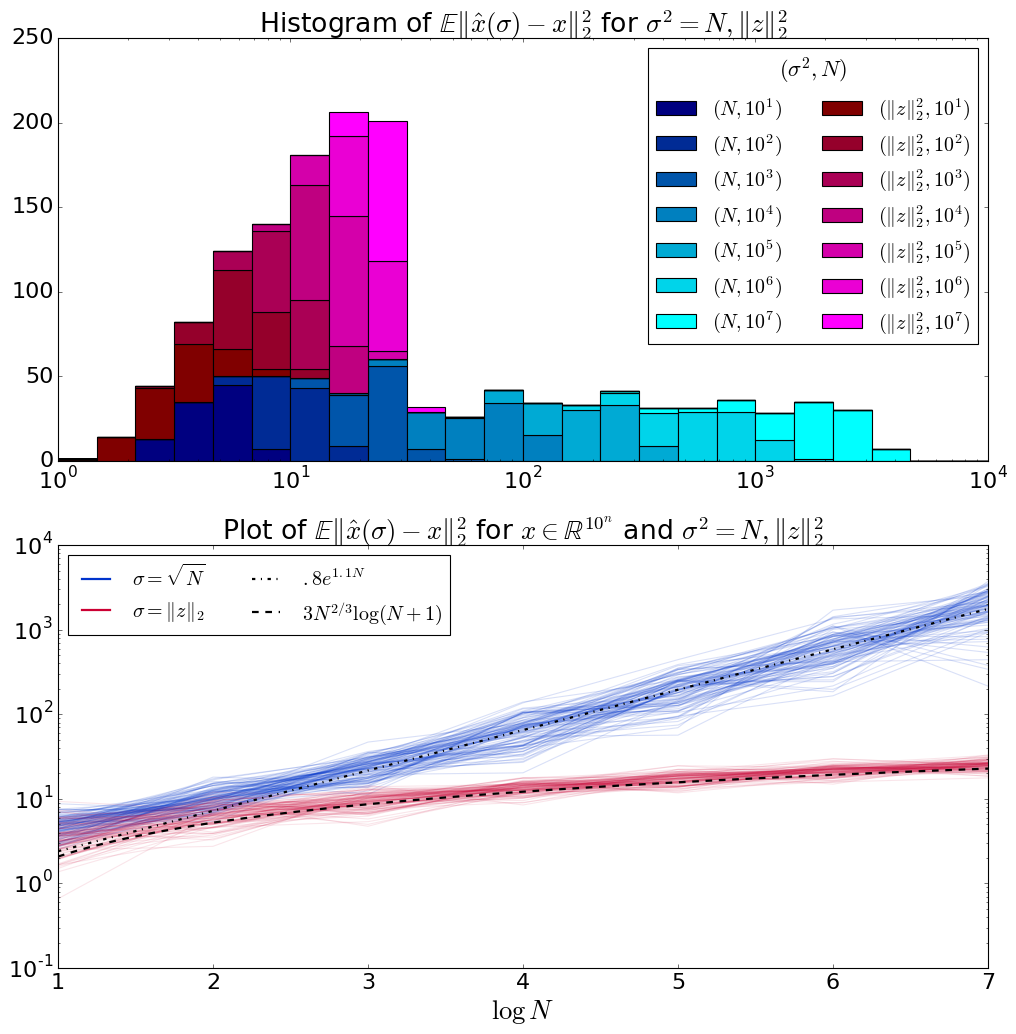

In [15]:
# Update font-size for axis tick labels if using savefig
matplotlib.rcParams.update({'font.size': 20})
fontSize = 24
legendFontSize = 18

plt.subplots(figsize=(15,15))

# Plot histogram of MSE
plt.subplot(211)
plt.hist(pd, log=False, stacked=True, bins=np.logspace(0, 4, 25), rwidth=1,
         color=[(0, k, .5 + k/2) for k in np.linspace(0, 1, 7)]+[(.5+k/2, 0, k) for k in np.linspace(0, 1, 7)])
leg1_lbl1 = ['$(N, 10^'+str(j)+')$' for j in range(1,8)]
leg1_lbl2 = ['$(\\|z\\|_2^2, 10^'+str(j)+')$' for j in range(1,8)]
leg1_ttl = '$(\\sigma^2, N)$'
leg1 = plt.legend(leg1_lbl1+leg1_lbl2, markerscale=.3, ncol=2, fontsize=legendFontSize)
leg1.set_title(leg1_ttl)
plt.title('Histogram of $\\mathbb{E} \\|\\hat x(\\sigma) - x\\|_2^2$ for $\\sigma^2 = N, \\|z\\|_2^2$', fontsize=fontSize)
plt.xscale('log');

# Plot MSE as a function of log(N)
plt.subplot(212)
# Plot the lines
plt.plot(range(1, 8), pd_N, c=(0,.2,.8,.15));
plt.plot(range(1, 8), pd_sqZ, c=(.8,0,.2,.1));
# See if we can get an analytic approximation to the lines
t = np.linspace(1, 7, 100);
plt.plot(t, 3 * t**(2/3)*np.log(t+1), 'k--', linewidth=2)
plt.plot(t, .8*np.exp(1.1*t), 'k-.', lw=2)
# Make the legend
blue_line = mlines.Line2D([], [], c=(0, .2, .8), lw=2, label='$\\sigma = \\sqrt{N}$')
red_line = mlines.Line2D([],[], c=(.8, 0, .2), lw=2, label='$\\sigma = \\|z\\|_2$')
blue_meanline = mlines.Line2D([],[], c=(0,0,0), lw=2, linestyle='-.', label='$.8 e^{1.1 N}$')
red_meanline = mlines.Line2D([],[], c=(0,0,0), lw=2, linestyle='--', label='$3N^{2/3}\\log(N+1)$')
plt.legend(handles=[blue_line, red_line, blue_meanline, red_meanline], loc=2, ncol=2, fontsize=legendFontSize)
# Add the title and labels
plt.title('Plot of $\\mathbb{E} \\|\\hat x(\\sigma) - x\\|_2^2$ for $x\\in \\mathbb{R}^{10^n}$ and $\\sigma^2 = N, \\|z\\|_2^2$',
          fontsize=fontSize)
plt.xlabel('$\\log\\,N$', fontsize=fontSize)
# Plot on log scale
plt.yscale('log');
# plt.ylim(0,100);

# Save figure
if doSaveFig:
    plt.gcf().savefig('PD_MSE_DimScaling_'+now+'.svg', dpi=72, format='svg')
    plt.close('all')

## Plotting noise scaling

In [16]:
logNmax = 7
logNvec = np.array(range(1, logNmax+1))
logNvec = np.atleast_2d(logNvec).T
noiseNormSq = np.zeros((logNmax, 100))
for logN in range(1, logNmax+1):
    for k in range(100):
        z = np.random.randn(10**logN)
        noiseNormSq[logN-1, k] = np.dot(z,z)

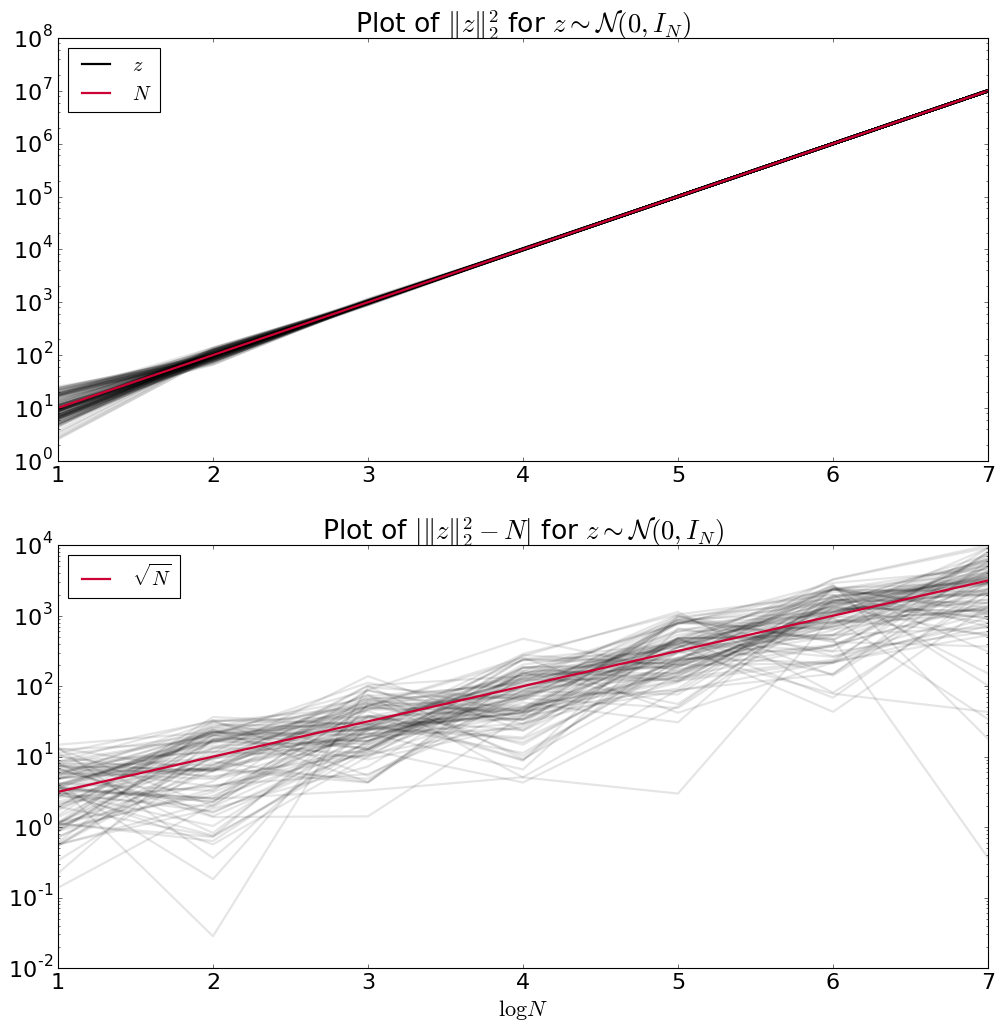

In [17]:
matplotlib.rcParams.update({'font.size': 20})
fontSize = 24
legendFontSize = 18

plt.subplots(figsize=(15,15))

# # # Plot 1
plt.subplot(211)
plt.plot(logNvec, noiseNormSq, c='k', alpha=.1, lw=3);
plt.plot(logNvec, 10**logNvec, linestyle='-', c=(.8, 0, .2), lw=2);
plt.yscale('log');
plt.title('Plot of $\\|z\\|_2^2$ for $z \\sim \\mathcal{N}(0, I_N)$')
# legend
black_line = mlines.Line2D([],[], c=(0,0,0), lw=2, linestyle='-', label='$z$')
red_Nline = mlines.Line2D([],[], c=(.8,0,.2), lw=2, linestyle='-', label='$N$')
plt.legend(handles=[black_line, red_Nline], loc=2, fontsize=18)

# # # Plot 2
plt.subplot(212)
plt.plot(logNvec, np.abs(noiseNormSq - 10**logNvec), c='k', alpha=.1, lw=2);
plt.plot(logNvec, 10**(logNvec/2), c=(.8,0,.2), lw=2)
plt.yscale('log')
plt.xlabel('$\\log N$');
plt.title('Plot of $|\\|z\\|_2^2 - N|$ for $z \\sim \\mathcal{N}(0, I_N)$');

red_Nline2 = mlines.Line2D([],[], c=(.8,0,.2), lw=2, linestyle='-', label='$\\sqrt{N}$')
plt.legend(handles=[red_Nline2], loc=2, fontsize=18)


#plt.savefig('mynoisefig.svg', dpi=72, format='svg')
if doSaveFig:
    plt.gcf().savefig('normalNormDimScaling'+now+'.png', dpi=72, format='png')
    plt.close('all')

## Re-doing figures

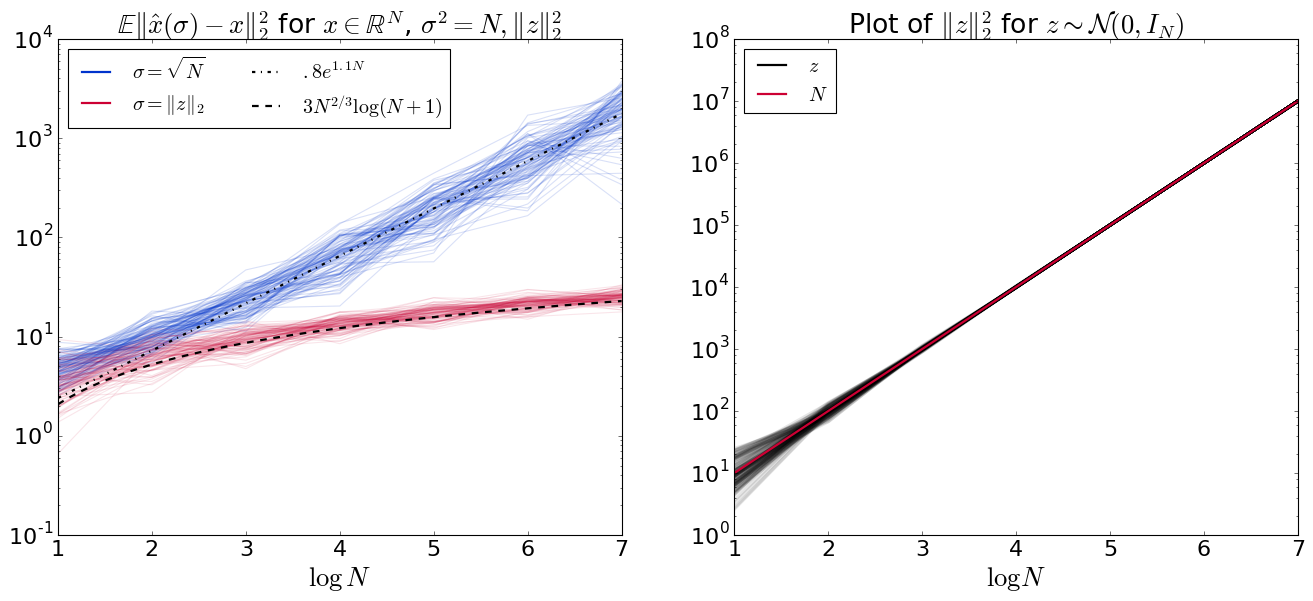

In [18]:
matplotlib.rcParams.update({'font.size': 20})
fontSize = 24
legendFontSize = 18

plt.subplots(figsize=(20,8))


# Plot MSE as a function of log(N)
plt.subplot(121)
# Plot the lines
plt.plot(range(1, 8), pd_N, c=(0,.2,.8,.15));
plt.plot(range(1, 8), pd_sqZ, c=(.8,0,.2,.1));
# See if we can get an analytic approximation to the lines
t = np.linspace(1, 7, 100);
plt.plot(t, 3 * t**(2/3)*np.log(t+1), 'k--', linewidth=2)
plt.plot(t, .8*np.exp(1.1*t), 'k-.', lw=2)
# Make the legend
blue_line = mlines.Line2D([], [], c=(0, .2, .8), lw=2, label='$\\sigma = \\sqrt{N}$')
red_line = mlines.Line2D([],[], c=(.8, 0, .2), lw=2, label='$\\sigma = \\|z\\|_2$')
blue_meanline = mlines.Line2D([],[], c=(0,0,0), lw=2, linestyle='-.', label='$.8 e^{1.1 N}$')
red_meanline = mlines.Line2D([],[], c=(0,0,0), lw=2, linestyle='--', label='$3N^{2/3}\\log(N+1)$')
plt.legend(handles=[blue_line, red_line, blue_meanline, red_meanline], loc=2, ncol=2, fontsize=legendFontSize)
# Add the title and labels
plt.title('$\\mathbb{E} \\|\\hat x(\\sigma) - x\\|_2^2$ for $x\\in \\mathbb{R}^{N}$, $\\sigma^2 = N, \\|z\\|_2^2$',
          fontsize=fontSize)
plt.xlabel('$\\log\\,N$', fontsize=fontSize)
# Plot on log scale
plt.yscale('log');


plt.subplot(122)
plt.plot(logNvec, noiseNormSq, c='k', alpha=.1, lw=3);
plt.plot(logNvec, 10**logNvec, linestyle='-', c=(.8, 0, .2), lw=2);
plt.yscale('log');
plt.xlabel('$\log N$', fontsize=fontSize)
plt.title('Plot of $\\|z\\|_2^2$ for $z \\sim \\mathcal{N}(0, I_N)$')
# legend
black_line = mlines.Line2D([],[], c=(0,0,0), lw=2, linestyle='-', label='$z$')
red_Nline = mlines.Line2D([],[], c=(.8,0,.2), lw=2, linestyle='-', label='$N$')
plt.legend(handles=[black_line, red_Nline], loc=2, fontsize=18)

if doSaveFig:
    plt.gcf().savefig('pdmsedimscalingandnoise'+now+'.png', dpi=72, format='png')
    plt.close('all')

## Empirically determining scaling of $\mathbb{E}\|\tilde x (\sigma(z)) - x\|_2^2$ for $\sigma(z) = \|z\|_2^2$

An example of this is plotted below using a ribbon plot, but also, see the associated file [Robust least-squares fit to logN-logMSE data](./Robust least-squares fit to logN-logMSE data.ipynb) for a better-but-incomplete determination of this. 

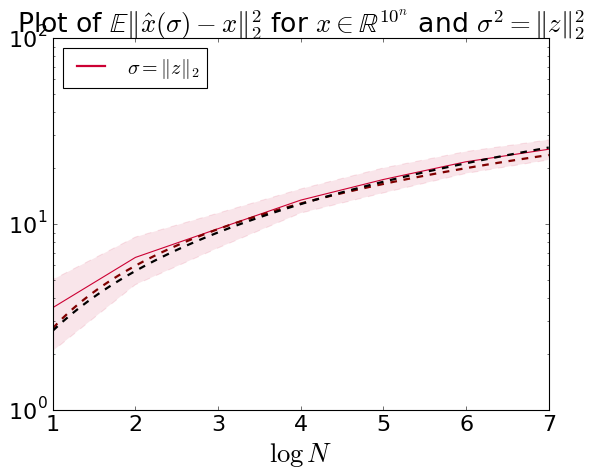

In [127]:
# Plot MSE as a function of log(N)
plt.figure(figsize=(8,6))

# mean and std
N_axis = [10**j for j in range(1,8)]
pdsqZ_mean = pd_sqZ.mean(axis=1)
pdsqZ_std = pd_sqZ.std(axis=1)

# Plot the fills
plt.fill_between(logNvec.ravel(), pdsqZ_mean-pdsqZ_std, pdsqZ_mean+pdsqZ_std, 
                 alpha=.1, linestyle='dashed', color=(.8,0,.2))

# Plot the means
plt.plot(logNvec.ravel(), pdsqZ_mean, c=(.8,0,.2,1));

# See if we can get an analytic approximation to the lines
t = np.linspace(1, 7, 100);
# for log-scaled plot
plt.plot(t, 3 * t**(2/3)*np.log(t+3/2), linestyle='--', linewidth=2, color=(.5, 0, 0))
# for non-log-scaled plot
plt.plot(t, 2*t**1.3+2/3, 'k--', linewidth=2)

# Make the legend
red_line = mlines.Line2D([],[], c=(.8, 0, .2), lw=2, 
                         label='$\\sigma = \\|z\\|_2$')
red_meanline = mlines.Line2D([],[], c=(0,0,0), lw=2, 
                             linestyle='--', label='$3N^{2/3}\\log(N+1)$')
plt.legend(handles=[red_line], loc=2, ncol=1, fontsize=legendFontSize)

# Add the title and labels
plt.title('Plot of $\\mathbb{E} \\|\\hat x(\\sigma) - x\\|_2^2$' + \
          ' for $x\\in \\mathbb{R}^{10^n}$ and $\\sigma^2 = \\|z\\|_2^2$',
          fontsize=fontSize)
plt.xlabel('$\\log\\,N$', fontsize=fontSize);
# Plot on log scale
plt.yscale('log');

# MSE as a function of `sigma`

In [ ]:
def parseData(**data):
    N = data.get('N')
    s = data.get('s')
    A = data.get('A')
    x = data.get('x')
    y = data.get('y')
    z = data.get('z')
    a = data.get('a')
    if x is None:
        if a is None:
            a = 1e6
        if s is None:
            s = 3
    if N is None:
        if A is None:
            proxD = True
            N = x.size
            m = N
        else:
            proxD = False
            m, N = A.shape
    elif m is None:
        if A is None:
            proxD = True
            m = N
        else:
            proxD = False
            m = A.shape[0]
    elif m < N:
        proxD = False
        A = np.random.randn(m,N)/np.sqrt(m)
    else:
        raise ValueError('We don\'t want to handle this case')
    if x is None:
        x = np.array([a for _ in range(s)] + 
                     [0 for _ in range(N-s)])
    if z is None:
        z = np.random.randn(m)
    if y is None:
        if proxD:
            y = x + eta * z
        else:
            y = np.dot(A,x) + eta * z
    return N, s, A, x, y, z, a

In [ ]:
def mse(sigma,eta=0.1,**data):
    N, s, A, x, y, z, a = parseData(**data)
    try:
        len_sigma = len(sigma)
    except TypeError as te:
        len_sigma = 1